# Module C: Basis Changes and Unitary Transformations

## The Concept of Basis

A **basis** is a complete set of orthonormal vectors $\{|e_i\rangle\}$.

Any state can be written: $|\psi\rangle = \sum_i c_i |e_i\rangle$

### Key Insight

The **same physical state** has different representations in different bases!

Example: The state $|+\rangle = \frac{1}{\sqrt{2}}(|\uparrow\rangle + |\downarrow\rangle)$
- In z-basis: $\begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix}$
- In x-basis: $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ (it's an eigenstate of $\sigma_x$!)

### Unitary Transformations

Basis changes are described by **unitary matrices** $U$:
- $U^\dagger U = U U^\dagger = I$
- Preserve inner products: $\langle U\phi | U\psi\rangle = \langle\phi|\psi\rangle$
- Preserve probabilities!

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
# Helper functions
def normalize(psi):
    return psi / np.sqrt(np.vdot(psi, psi))

def inner_product(phi, psi):
    return np.vdot(phi, psi)

def expectation_value(psi, A):
    return np.real(np.vdot(psi, A @ psi))

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

## Constructing Unitary Basis Change Matrices

### From Eigenstates to Unitary

If $\{|a_i\rangle\}$ are eigenstates of operator $A$, and $\{|b_i\rangle\}$ are eigenstates of operator $B$:

The unitary $U$ that transforms from A-basis to B-basis has matrix elements:
$$U_{ij} = \langle b_i | a_j \rangle$$

In [3]:
def basis_change_unitary(from_basis, to_basis):
    """
    Construct unitary matrix for basis transformation.
    
    Parameters:
    -----------
    from_basis : list of ndarray
        Original basis vectors
    to_basis : list of ndarray
        Target basis vectors
        
    Returns:
    --------
    U : ndarray
        Unitary transformation matrix
        New components = U @ old components
    """
    N = len(from_basis)
    U = np.zeros((N, N), dtype=complex)
    
    for i in range(N):
        for j in range(N):
            # U_ij = ⟨to_i | from_j⟩
            U[i, j] = inner_product(to_basis[i], from_basis[j])
    
    return U


def is_unitary(U, tol=1e-10):
    """Check if matrix is unitary: U†U = I"""
    N = U.shape[0]
    product = np.conj(U.T) @ U
    return np.allclose(product, np.eye(N), atol=tol)

In [4]:
# ============================================================
# EXAMPLE: σz basis to σx basis transformation
# ============================================================

# σz eigenstates (computational basis)
z_basis = [
    np.array([1, 0], dtype=complex),  # |↑⟩
    np.array([0, 1], dtype=complex),  # |↓⟩
]

# σx eigenstates
x_basis = [
    normalize(np.array([1, 1], dtype=complex)),   # |+⟩
    normalize(np.array([1, -1], dtype=complex)),  # |−⟩
]

# Construct the unitary
U_z_to_x = basis_change_unitary(z_basis, x_basis)

print("Unitary: σz basis → σx basis")
print("="*40)
print(f"U = \n{U_z_to_x}")
print(f"\nIs unitary: {is_unitary(U_z_to_x)}")
print(f"\nThis is the Hadamard gate up to a factor!")

Unitary: σz basis → σx basis
U = 
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Is unitary: True

This is the Hadamard gate up to a factor!


## Transforming State Vectors

### How Coordinates Change

If $|\psi\rangle$ has components $(c_1, c_2, ...)$ in basis A,
then in basis B: $(c'_1, c'_2, ...) = U \cdot (c_1, c_2, ...)$

In [5]:
# Transform a state from z-basis to x-basis representation
psi_z = np.array([1, 0], dtype=complex)  # |↑⟩ in z-basis

# Apply unitary
psi_x = U_z_to_x @ psi_z

print("State |↑⟩:")
print(f"  In z-basis: {psi_z}")
print(f"  In x-basis: {psi_x}")
print(f"\nInterpretation: |↑⟩ has equal components in |+⟩ and |−⟩")

State |↑⟩:
  In z-basis: [1.+0.j 0.+0.j]
  In x-basis: [0.70710678+0.j 0.70710678+0.j]

Interpretation: |↑⟩ has equal components in |+⟩ and |−⟩


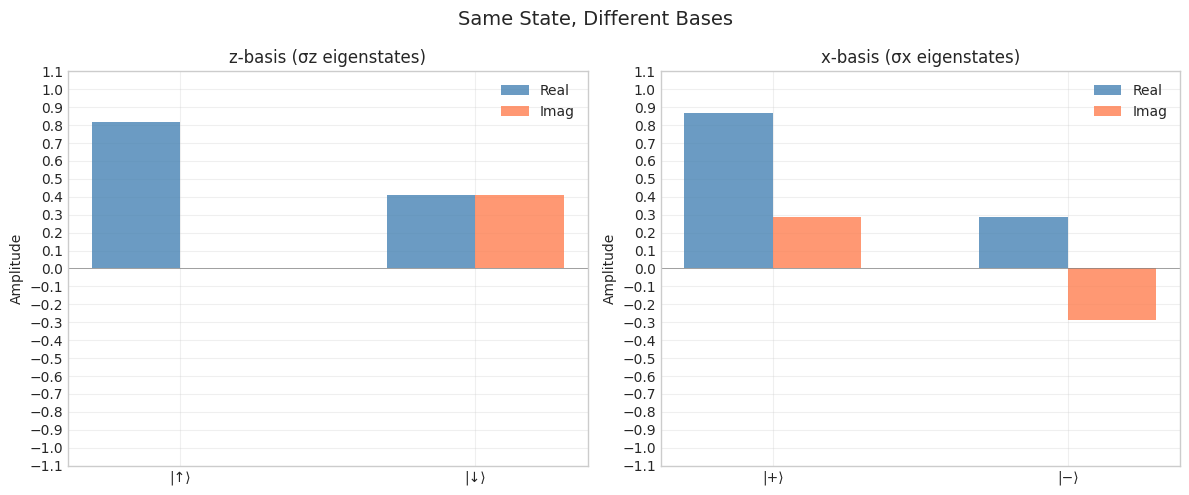

In [23]:
# ============================================================
# VISUALIZATION: Side-by-side comparison
# ============================================================

def plot_state_comparison(psi_A, psi_B, labels_A, labels_B, title_A, title_B):
    """
    Plot state components in two different bases side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    x = np.arange(len(psi_A))
    
    # Basis A
    ax1.bar(x - 0.15, np.real(psi_A), 0.3, label='Real', color='steelblue', alpha=0.8)
    ax1.bar(x + 0.15, np.imag(psi_A), 0.3, label='Imag', color='coral', alpha=0.8)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels_A)
    ax1.set_ylabel('Amplitude')
    ax1.set_title(title_A)
    ax1.set_ylim(-1.1, 1.1)
    ax1.axhline(0, color='gray', linewidth=0.5)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    # Basis B  
    ax2.bar(x - 0.15, np.real(psi_B), 0.3, label='Real', color='steelblue', alpha=0.8)
    ax2.bar(x + 0.15, np.imag(psi_B), 0.3, label='Imag', color='coral', alpha=0.8)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels_B)
    ax2.set_ylabel('Amplitude')
    ax2.set_title(title_B)
    ax2.set_ylim(-1.1, 1.1)
    ax2.axhline(0, color='gray', linewidth=0.5)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    plt.suptitle('Same State, Different Bases', fontsize=14)
    plt.tight_layout()
    plt.show()

# Example: arbitrary state
psi = normalize(np.array([1, 0.5 + 0.5j], dtype=complex))
psi_transformed = U_z_to_x @ psi

plot_state_comparison(psi, psi_transformed,
                      ['|↑⟩', '|↓⟩'], ['|+⟩', '|−⟩'],
                      'z-basis (σz eigenstates)', 'x-basis (σx eigenstates)')

## Invariance of Physical Quantities

### Key Theorem

Physical quantities are **basis-independent**:
- Probabilities: $|\langle a|\psi\rangle|^2$ same in any basis
- Expectation values: $\langle\hat{A}\rangle$ same in any basis

This is because unitary transformations preserve inner products!

In [24]:
# Verify invariance of expectation values
psi = normalize(np.array([1, 0.5j], dtype=complex))
psi_transformed = U_z_to_x @ psi

# Transform the operator too: A' = U A U†
sigma_z_in_xbasis = U_z_to_x @ sigma_z @ np.conj(U_z_to_x.T)

# Calculate expectation values
exp_original = expectation_value(psi, sigma_z)
exp_transformed = expectation_value(psi_transformed, sigma_z_in_xbasis)

print("Expectation Value Invariance Check:")
print("="*50)
print(f"⟨σz⟩ in z-basis: {exp_original:.6f}")
print(f"⟨σz⟩ in x-basis: {exp_transformed:.6f}")
print(f"\n✓ Difference: {abs(exp_original - exp_transformed):.2e}")

Expectation Value Invariance Check:
⟨σz⟩ in z-basis: 0.600000
⟨σz⟩ in x-basis: 0.600000

✓ Difference: 3.33e-16


## Visualizing the Unitary Matrix

### Heatmap of $|U_{ij}|^2$

The quantity $|U_{ij}|^2 = |\langle b_i | a_j \rangle|^2$ represents:
- Probability of measuring state $|b_i\rangle$ given preparation in $|a_j\rangle$
- How much each old basis state "contributes" to each new basis state

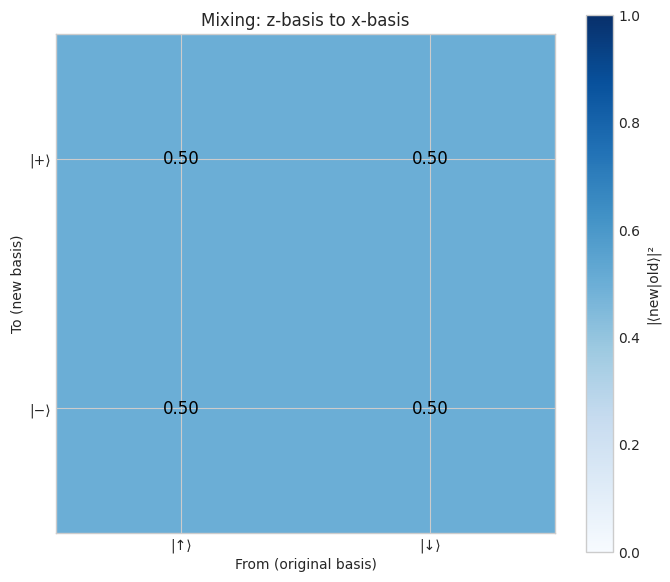

In [25]:
def plot_unitary_heatmap(U, from_labels, to_labels, title="Basis Mixing"):
    """
    Visualize |U_ij|² as a heatmap.
    """
    prob_matrix = np.abs(U)**2
    
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(prob_matrix, cmap='Blues', vmin=0, vmax=1)
    
    # Labels
    ax.set_xticks(range(len(from_labels)))
    ax.set_xticklabels(from_labels)
    ax.set_yticks(range(len(to_labels)))
    ax.set_yticklabels(to_labels)
    ax.set_xlabel('From (original basis)')
    ax.set_ylabel('To (new basis)')
    ax.set_title(title)
    
    # Annotate cells
    for i in range(len(to_labels)):
        for j in range(len(from_labels)):
            text = ax.text(j, i, f'{prob_matrix[i,j]:.2f}',
                          ha='center', va='center', fontsize=12,
                          color='white' if prob_matrix[i,j] > 0.5 else 'black')
    
    plt.colorbar(im, label='|⟨new|old⟩|²')
    plt.tight_layout()
    plt.show()

plot_unitary_heatmap(U_z_to_x, ['|↑⟩', '|↓⟩'], ['|+⟩', '|−⟩'],
                     'Mixing: z-basis to x-basis')

## Continuous Basis Rotation

### Parameterized Unitaries

We can smoothly interpolate between bases using:
$$U(\theta) = e^{-i\theta G}$$

where $G$ is a Hermitian "generator".

For spin-1/2: $U(\theta) = e^{-i\theta\sigma_y/2}$ rotates around the y-axis.

In [26]:
def rotation_unitary(theta, axis='y'):
    """
    Rotation unitary: U = exp(-i θ σ/2)
    
    Parameters:
    -----------
    theta : float
        Rotation angle in radians
    axis : str
        'x', 'y', or 'z' for rotation axis
    """
    if axis == 'x':
        sigma = sigma_x
    elif axis == 'y':
        sigma = sigma_y
    else:
        sigma = sigma_z
    
    # Matrix exponential: exp(-i θ σ/2)
    # For Pauli matrices: exp(-i θ σ/2) = cos(θ/2)I - i sin(θ/2)σ
    I = np.eye(2, dtype=complex)
    return np.cos(theta/2) * I - 1j * np.sin(theta/2) * sigma

In [27]:
# ============================================================
# ANIMATION: Continuous basis rotation
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
initial_state = np.array([1, 0], dtype=complex)  # |↑⟩

def init():
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-1.2, 1.2)
    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(0, 1.1)
    return []

def animate(frame):
    for ax in [ax1, ax2]:
        ax.clear()
    
    # Rotation angle from 0 to π
    theta = frame * np.pi / 50
    U = rotation_unitary(theta, 'y')
    psi = U @ initial_state
    
    # Left: State amplitudes
    x = [0, 1]
    ax1.bar([0], [np.real(psi[0])], 0.3, label='Re', color='steelblue', alpha=0.8)
    ax1.bar([1], [np.real(psi[1])], 0.3, color='steelblue', alpha=0.8)
    ax1.bar([0.35], [np.imag(psi[0])], 0.3, label='Im', color='coral', alpha=0.8)
    ax1.bar([1.35], [np.imag(psi[1])], 0.3, color='coral', alpha=0.8)
    ax1.set_xticks([0.15, 1.15])
    ax1.set_xticklabels(['|↑⟩', '|↓⟩'])
    ax1.axhline(0, color='gray', linewidth=0.5)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_ylabel('Amplitude')
    ax1.set_title(f'State Components (θ = {np.degrees(theta):.0f}°)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right: Probabilities
    probs = np.abs(psi)**2
    ax2.bar(x, probs, color='seagreen', alpha=0.8)
    ax2.set_xticks(x)
    ax2.set_xticklabels(['P(↑)', 'P(↓)'])
    ax2.set_ylim(0, 1.1)
    ax2.set_ylabel('Probability')
    ax2.set_title('Measurement Probabilities')
    ax2.grid(True, alpha=0.3)
    
    return []

anim = FuncAnimation(fig, animate, init_func=init, frames=51, interval=100, blit=False)
plt.close()
HTML(anim.to_jshtml())

## Summary

### Basis Changes

1. **Unitary matrices** transform between bases
2. **Same state** looks different in different bases
3. **Physical quantities** (probabilities, expectation values) are invariant
4. **Continuous rotations**: $U(\theta) = e^{-i\theta G}$

### Visualization Tools

| Plot Type | What It Shows |
|-----------|---------------|
| Side-by-side bars | State in two bases |
| Heatmap | Mixing probabilities |
| Animation | Continuous rotation |